In [3]:
using BeamLib

# array we want to compare the nested one with
pa = BeamLib.PhasedArray1D(-6e-2, -2e-2, 2e-2, 6e-2)

# unecessarily deeply nested array - just for demonstration
base_pa1 = BeamLib.PhasedArray1D(-2e-2, 2e-2)
base_pa2 = BeamLib.PhasedArray1D(0)
nested_pa = BeamLib.NestedArray([base_pa1, NestedArray([base_pa2, base_pa2], PhasedArray1D(-2e-2, 2e-2))], PhasedArray1D(-4e-2, 4e-2))
weights = BeamLib.dsb_weights(nested_pa, 3.75e9, deg2rad(110))

faxis = LinRange(3.7e9, 3.8e9, 1024)
# notice how both steering vectors are identical
println(weights)
println(BeamLib.dsb_weights(pa, 3.75e9, deg2rad(110)))

ComplexF64[-0.010509753549116832 + 0.2497789924720188im, 0.21473299713986604 + 0.12802241967456435im, 0.21473299713986604 - 0.12802241967456435im, -0.010509753549116832 - 0.2497789924720188im]
ComplexF64[-0.01050975354911683 + 0.2497789924720188im, 0.21473299713986604 + 0.12802241967456435im, 0.21473299713986604 - 0.12802241967456435im, -0.01050975354911683 - 0.2497789924720188im]


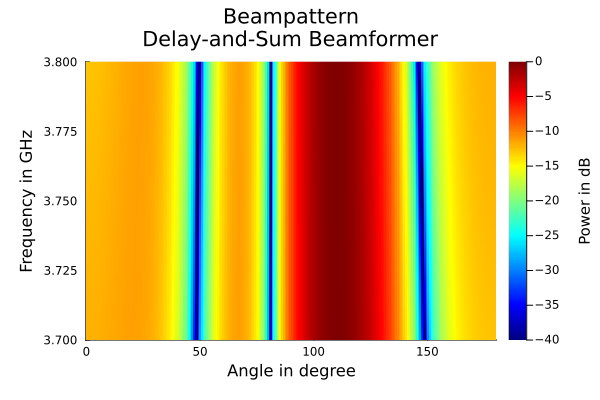

In [4]:
ϕaxis = LinRange(0, 180, 256)
W = Ref(weights').*BeamLib.steerphi.(Ref(nested_pa), faxis, deg2rad.(ϕaxis)')
WdB = 20*log10.(abs.(W))

using Plots
import Measures
p1 = heatmap(ϕaxis,faxis/1e9, WdB, cmap = :jet, clim=(-40, 0))
plot!(title="Beampattern\nDelay-and-Sum Beamformer", cbar_title="\nPower in dB", margin=5*Measures.mm)
xlabel!("Angle in degree")
ylabel!("Frequency in GHz")

In [5]:
kxaxis = LinRange(-π/4e-2, π/4e-2, 256) # Nyquist theorem with k_s = 2π/4cm and k_s/2 = π/4cm
W = Ref(weights').*BeamLib.steerk.(Ref(nested_pa), faxis, kxaxis')
WdB = 20*log10.(abs.(W))

using Plots
import Measures
p1 = heatmap(kxaxis, faxis/1e9, WdB, cmap = :jet, clim=(-40, 0))
plot!(title="Beampattern\nDelay-and-Sum Beamformer", cbar_title="\nPower in dB", margin=5*Measures.mm)
xlabel!("Wavenumber in rad/m")
ylabel!("Frequency in GHz")

MethodError: MethodError: no method matching steerk(::NestedArray, ::Float64, ::Float64)
The function `steerk` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  steerk(!Matched::PhasedArray1D, ::Any, ::Any, !Matched::Any, !Matched::Any; fs, c)
   @ BeamLib c:\Users\matt\OneDrive\Dokumente\__Master\Julia\beamlib\src\BeamLib.jl:98
  steerk(!Matched::PhasedArray1D, ::Any, ::Any, !Matched::Any; ...)
   @ BeamLib c:\Users\matt\OneDrive\Dokumente\__Master\Julia\beamlib\src\BeamLib.jl:98
  steerk(!Matched::PhasedArray1D, ::Any, ::Any; ...)
   @ BeamLib c:\Users\matt\OneDrive\Dokumente\__Master\Julia\beamlib\src\BeamLib.jl:98
  ...


Note how the beampattern is not pinched/stretched for changing frequencies when plotted over a wavenumber axis. 